<a href="https://colab.research.google.com/github/barbarajunq131/Programas/blob/main/C%C3%B3pia_de_Trabalho_disciplina_Mercado_sementes_nativas_2_variaveis_deap_nsga_II_3dvis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. Connect with google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#1. Install packages

In [ ]:
!pip install git+git://github.com/mkrphys/ipython-tikzmagic.git

!pip install plotly==4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning git://github.com/mkrphys/ipython-tikzmagic.git to /tmp/pip-req-build-03ptxjbk
  Running command git clone -q git://github.com/mkrphys/ipython-tikzmagic.git /tmp/pip-req-build-03ptxjbk
  fatal: unable to connect to github.com:
  github.com[0: 140.82.121.4]: errno=Connection timed out

ERROR: Command errored out with exit status 128: git clone -q git://github.com/mkrphys/ipython-tikzmagic.git /tmp/pip-req-build-03ptxjbk Check the logs for full command output.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 14.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=ae506761ff84f369c217a8c7dce8c35614445f77f4fafc8b57e2895859a079d5
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successful

#2. Import packages

In [ ]:
import time, array, random, copy, math, six, itertools
import numpy as np
import pandas as pd
import itertools
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
import plotly.express as px
import plotly
from matplotlib.path import Path
from matplotlib import animation, patches
from IPython.display import HTML
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from deap import algorithms, base, benchmarks, tools, creator
from random import randrange
import deap.benchmarks.tools as bt

import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('talk')

markers = ['o', '^', 's', 'D', 'v', 'h', 'p']

#3. Functions

In [ ]:
def already_evaluated_indivs(individual, df):
  fvec = [ f for f in  df.loc[individual[0]]]
  # print(fvec)
  return fvec

In [ ]:
def allintallele(bound_low, bound_up, size=None):
  i = bound_low
  while True:
    yield [i%bound_up]
    i += 1

In [ ]:
def allintf(): #wraps generator allint as function, according to the format that toolbox.resgiter() requires
  return next(allint)

In [ ]:
def run_ea(toolbox, stats=None, verbose=False):
    pop = toolbox.population(n=toolbox.pop_size)
    pop = toolbox.select(pop, len(pop))
    return algorithms.eaMuPlusLambda(pop, toolbox, mu=toolbox.pop_size,
                                     lambda_=toolbox.pop_size,
                                     cxpb=1-toolbox.mut_prob,
                                     mutpb=toolbox.mut_prob,
                                     stats=stats,
                                     ngen=toolbox.max_gen,
                                     verbose=verbose)

#4. Create cmap

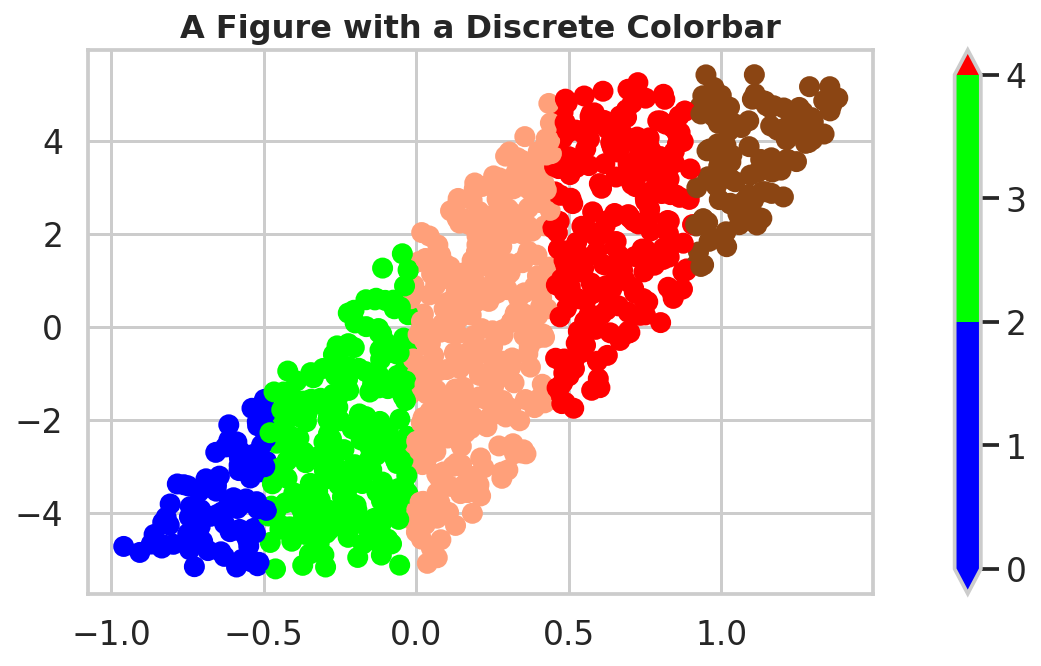

In [ ]:
#create colormap -> eaf classification cmap
import matplotlib as mpl
# Setting the figure size
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 5), gridspec_kw = {'width_ratios':[3, 0.1]})

# Initializing the data
num = 1000
x1 = np.linspace(-0.5,1,num) + (0.5 - np.random.rand(num))
y1 = np.linspace(-5,5,num) + (0.5 - np.random.rand(num))

# Initializing colors and building a colormap
cmap = mpl.colors.ListedColormap(['blue','lime','lightsalmon','red','saddlebrown'])

# Setting the Colormap
ax1.scatter(x1, y1, c=x1, cmap=cmap)
ax1.set_title('A Figure with a Discrete Colorbar', fontsize=16, weight='bold')

# Setting the Discrete Colorbar
bounds = [0, 1, 2,3,4]
mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                boundaries=[0] + bounds + [10],
                                extend='both',
                                ticks=bounds,spacing='proportional')



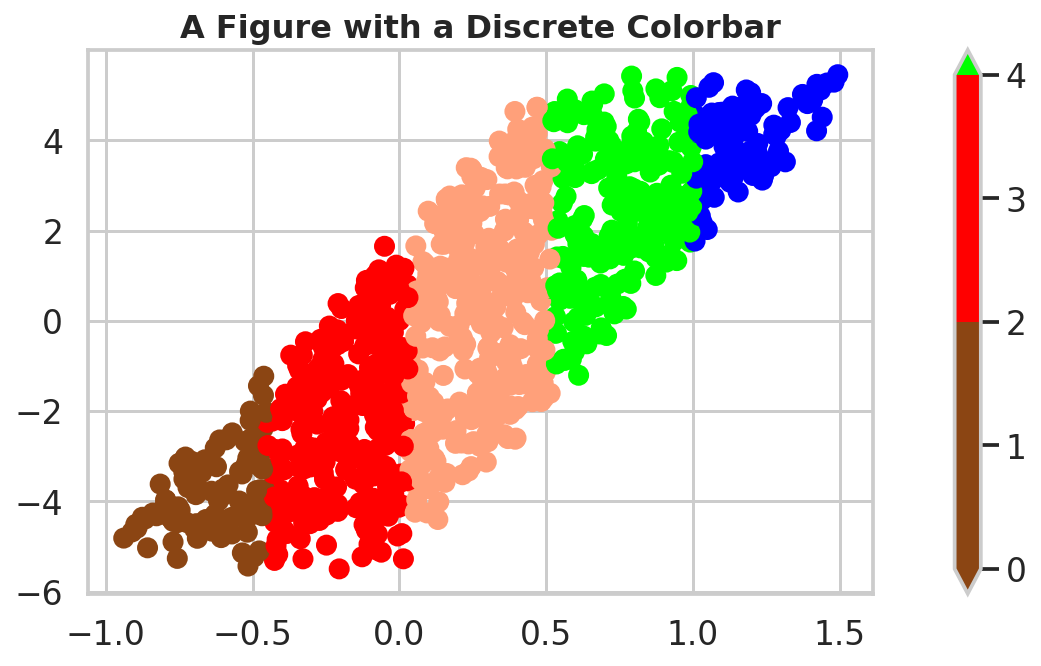

In [ ]:
#create colormap -> eaf classification cmap
import matplotlib as mpl
# Setting the figure size
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8, 5), gridspec_kw = {'width_ratios':[3, 0.1]})

# Initializing the data
num = 1000
x1 = np.linspace(-0.5,1,num) + (0.5 - np.random.rand(num))
y1 = np.linspace(-5,5,num) + (0.5 - np.random.rand(num))

# Initializing colors and building a colormap
cmap2 = mpl.colors.ListedColormap(['saddlebrown',
                                   'red',
                                   'lightsalmon',
                                   'lime',
                                   'blue'
                                   ])

# Setting the Colormap
ax1.scatter(x1, y1, c=x1, cmap=cmap2)
ax1.set_title('A Figure with a Discrete Colorbar', fontsize=16, weight='bold')

# Setting the Discrete Colorbar
bounds = [0, 1, 2,3,4]
mpl.colorbar.ColorbarBase(ax2, cmap=cmap2,
                                boundaries=[0] + bounds + [10],
                                extend='both',
                                ticks=bounds,spacing='proportional')



#5. Create folders

* Remember to upload manually the csvs (automate in the future using google drive)

In [ ]:
!mkdir results
# !mkdir results/ipvs_figures
# !mkdir results/ranking_figures
# !mkdir results/final_classification
# !mkdir results/hypervols_calculation
# !mkdir results/hypervols_figures

mkdir: cannot create directory ‘results’: File exists


#6. Implement MOEA (NSGA-2 or SPEA-2)

In [ ]:
# import multiprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

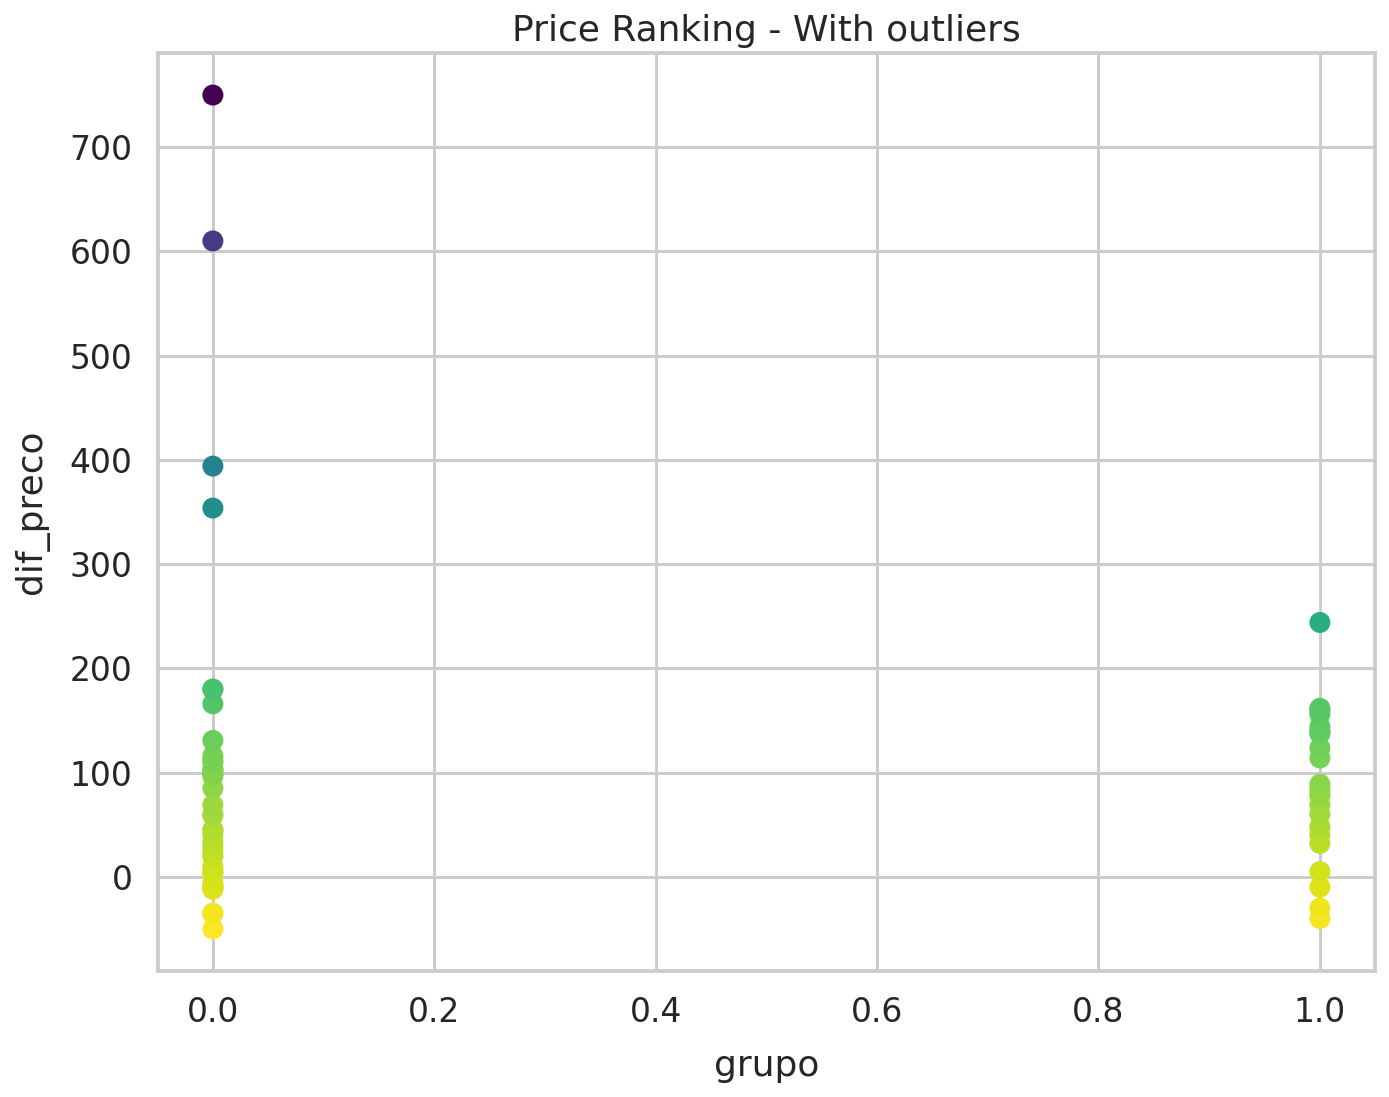

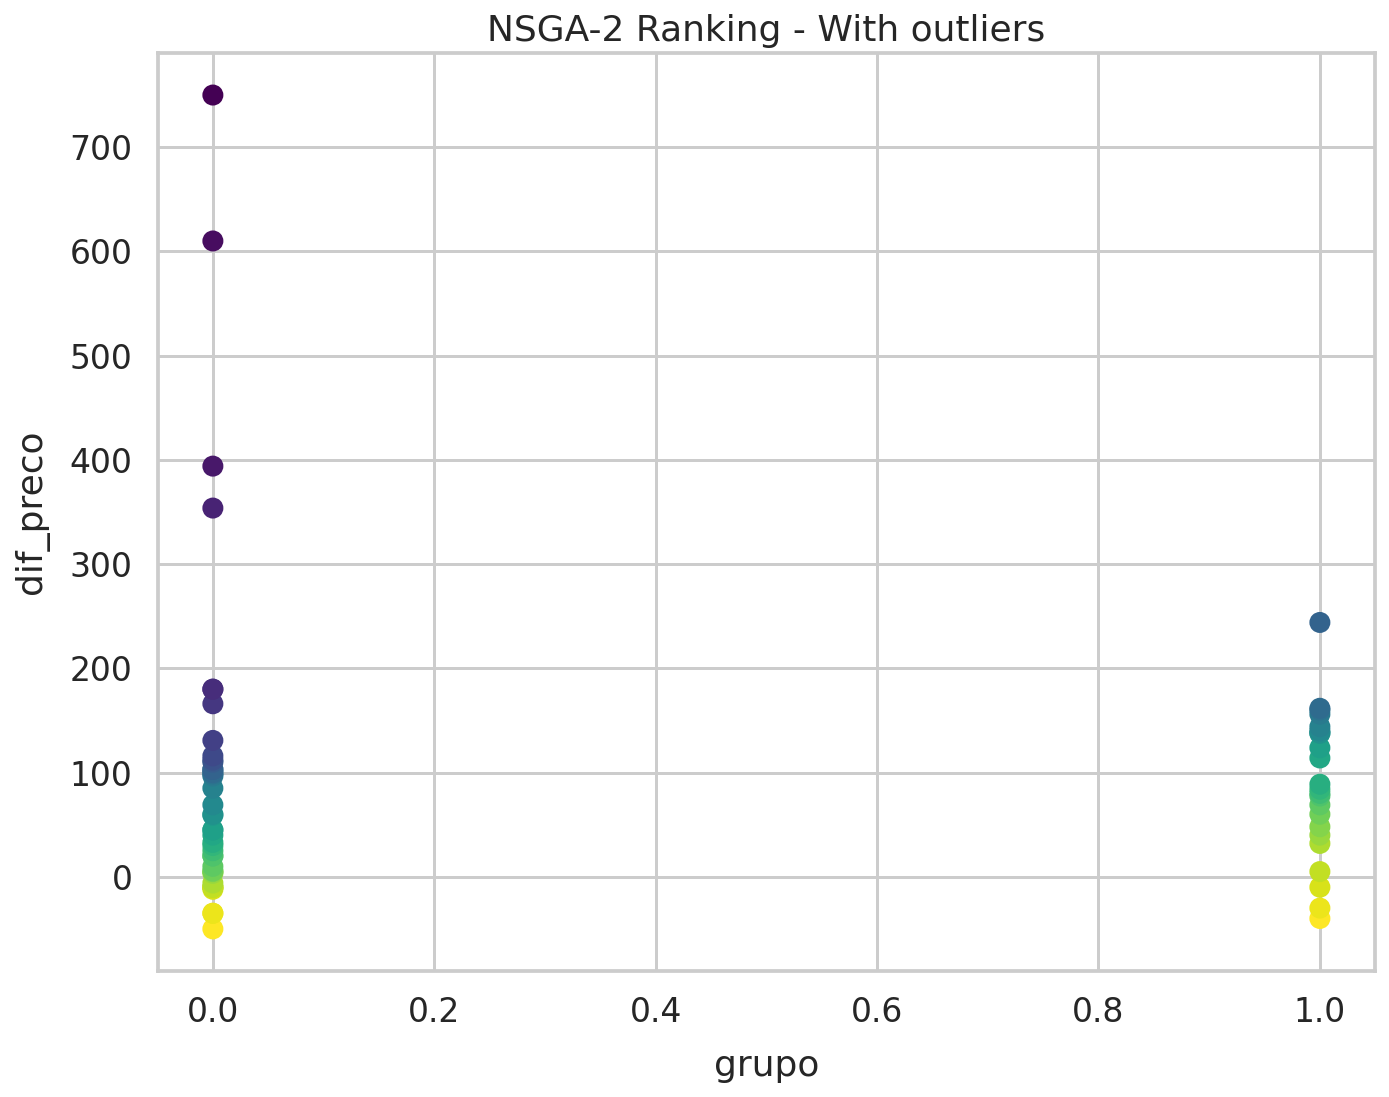

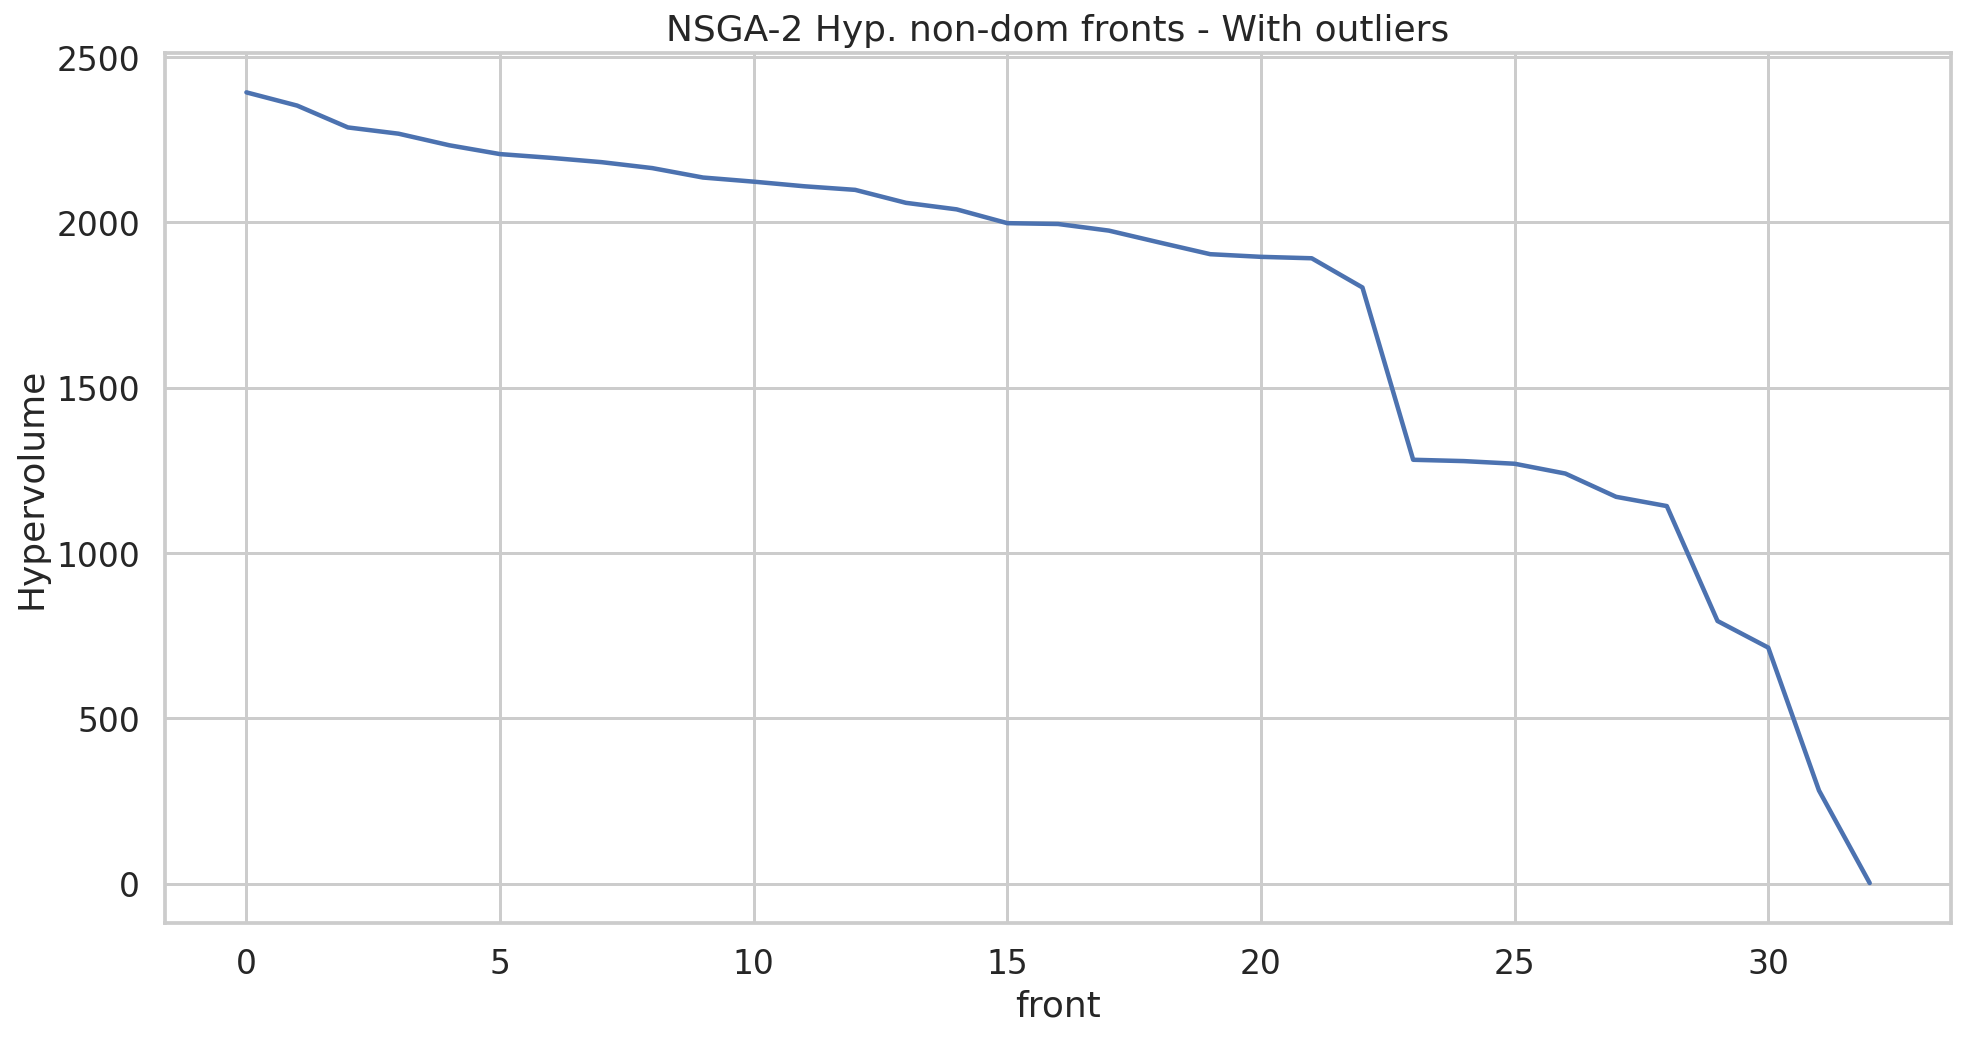

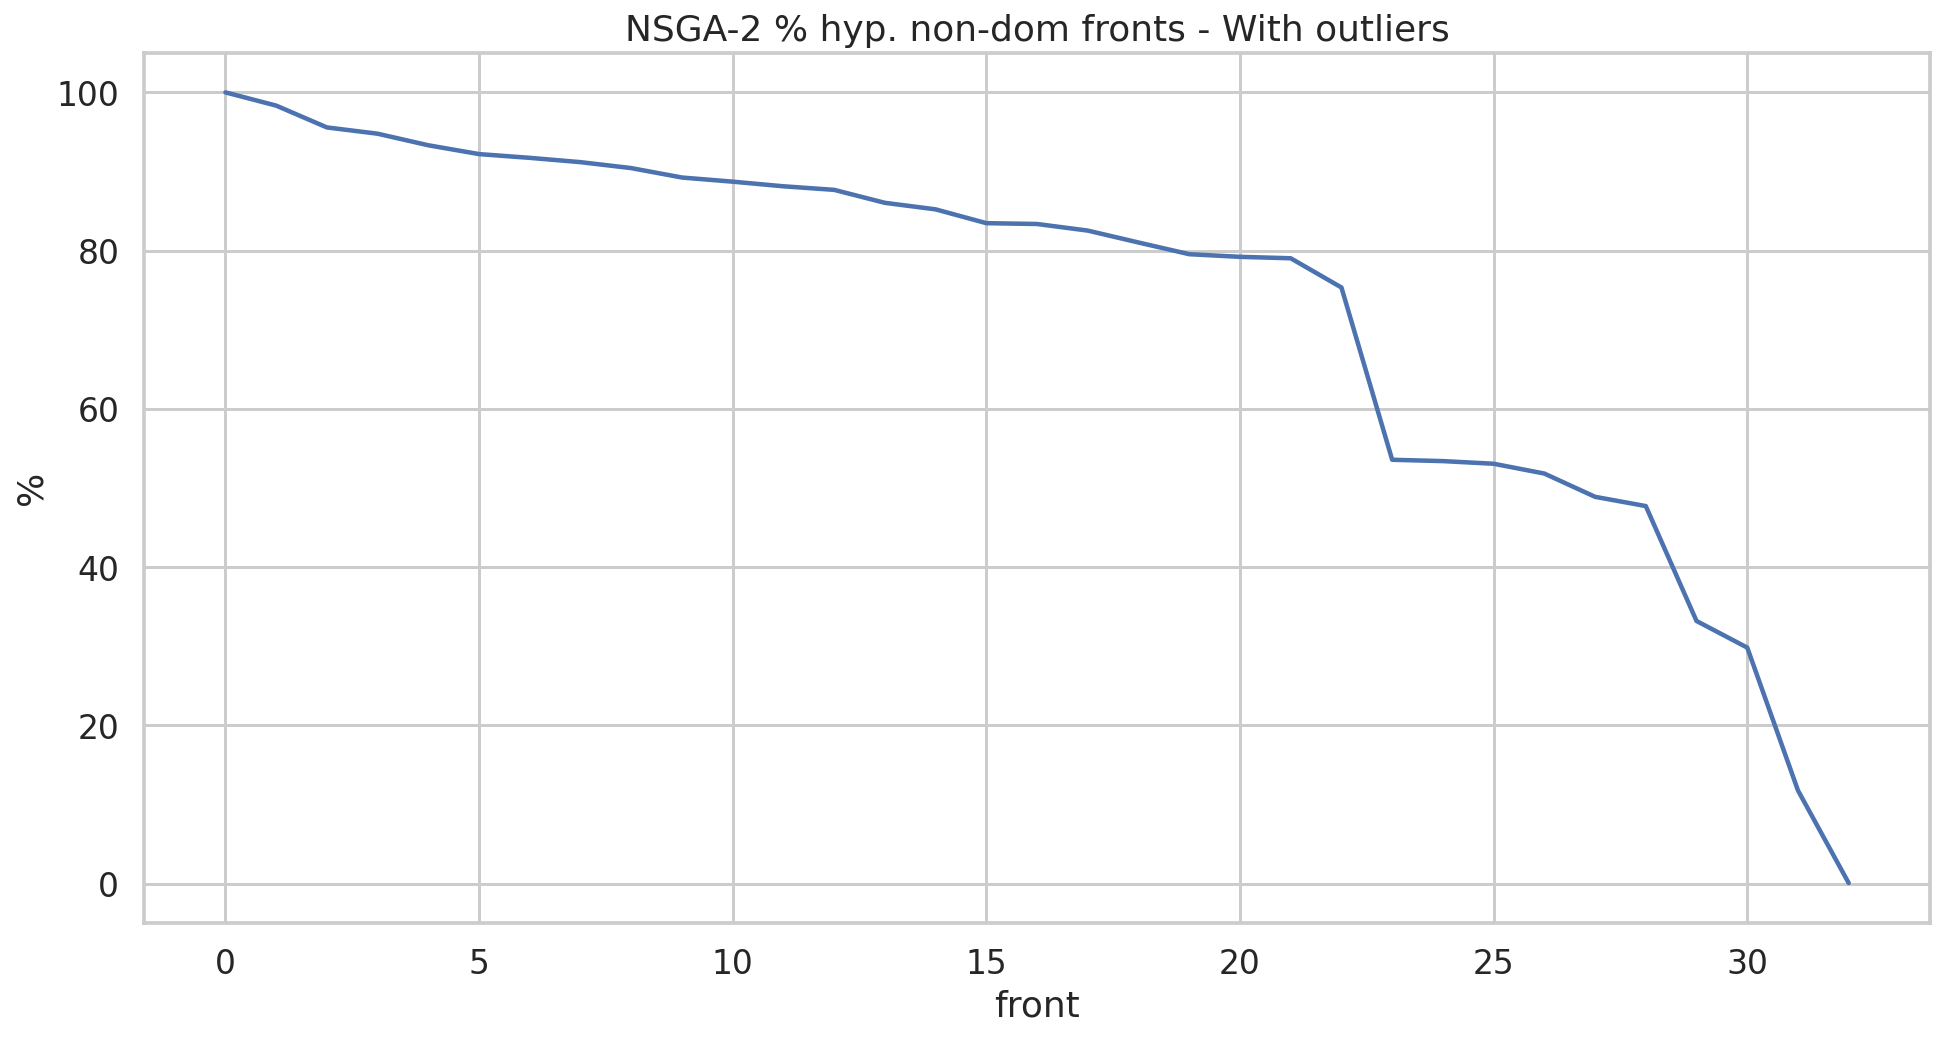

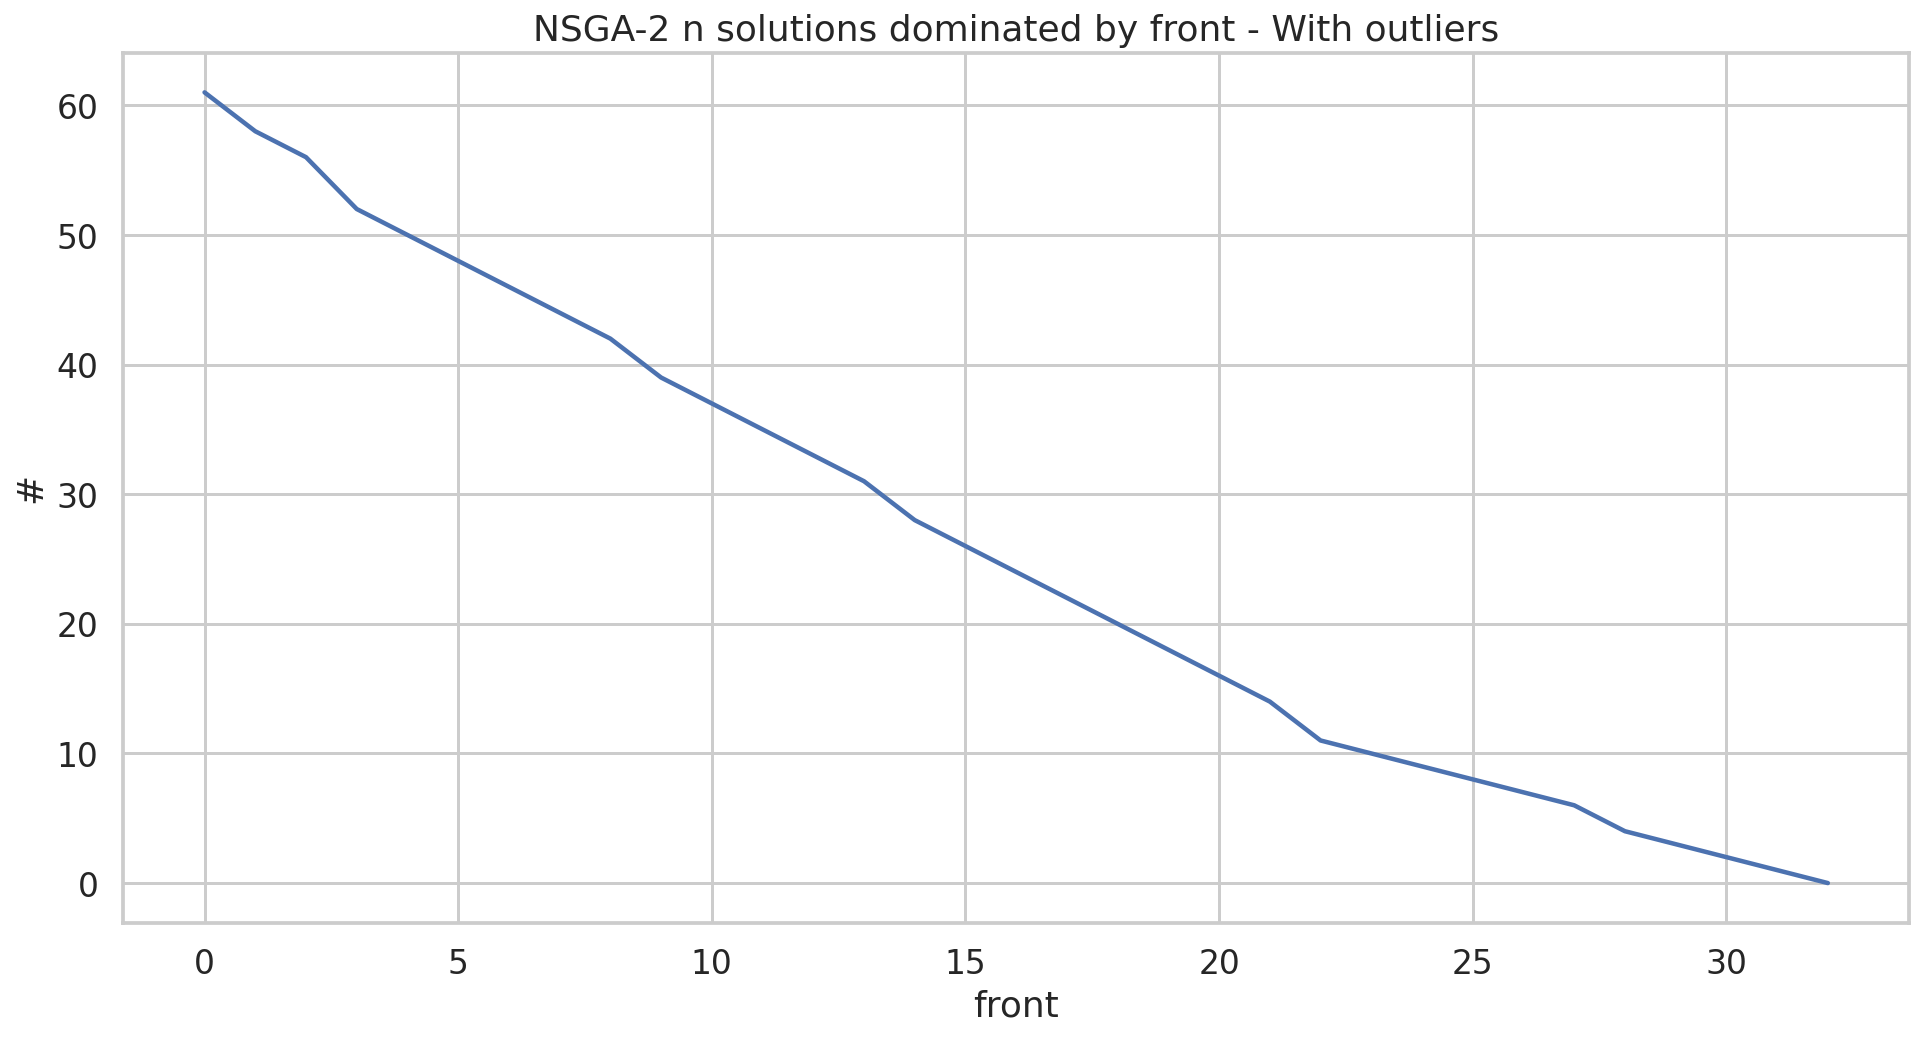

In [ ]:
#creating the datasets

###com outliers
# csv_list = ['gt_fome_clustered.csv']

###sem outliers
csv_list = ['/content/drive/Shareddrives/SCC5858/Projeto - Mercado de sementes nativas/dataset_sementes.csv']



# csv_list = ['final_dataset_2019_cluster.csv']

for csv in csv_list:
  original_df = pd.read_csv(csv, na_values=['#DIV/0!'])

  # original_df.drop(columns=['LATITUDE', 'NR_GRAU_LAT', 'NR_MIN_LAT', 'NR_SEG_LAT', 'LONGITUDE',
  #                           'NR_GRAU_LONG', 'NR_MIN_LONG', 'NR_SEG_LONG', 'NM_CLASSIF_PRODUTO',
  #                           'NM_CULTURA_GLOBAL', 'NR_AREA_TOTAL', 'NR_PRODUTIVIDADE_SEGURADA',
  #                           'NivelDeCobertura', 'VL_LIMITE_GARANTIA', 'VL_PREMIO_LIQUIDO',
  #                           'PE_TAXA', 'VL_SUBVENCAO_FEDERAL'],inplace=True)

  # original_df = original_df[original_df['VL_PREMIO_LIQUIDO_AREA'].notna()]

  original_df["grupo"].replace({"não pioneira": "0", "pioneira": "1"}, inplace=True)

  original_df.reset_index(inplace=True,drop=True)

  original_df['grupo'] = original_df['grupo'].astype(np.float64)
  # original_df['VL_LIMITE_GARANTIA_AREA'] = original_df['VL_LIMITE_GARANTIA_AREA'].astype(np.float64)

  df = original_df.copy()

  df.drop(columns=['nome'],inplace=True)


  # xxxxx - descomentar abaixo

  df2 = df.copy()

  # XXX - remover depois - teste
  # df2 = df.head(1000).copy()

  df2_copy = df2.copy()

  ###com outliers
  # df2.drop(columns=['Unnamed: 0','cluster'],inplace=True)


  # ###sem outliers
  # df2.drop(columns=['Unnamed: 0','X','cluster'],inplace=True)


  # #implementing the MOEA
  toolbox = base.Toolbox()

  creator.create("Fitness3Obj", base.Fitness, weights=(+1.0,-1.0))
  creator.create("Individual3Obj", array.array, typecode='f', fitness=creator.Fitness3Obj)

  toolbox.register("evaluate", lambda ind: already_evaluated_indivs(ind,df2))

  BOUND_LOW, BOUND_UP = 0, df2.shape[0]-1 # for already_evaluated_indiv()
  N_DIM = 2

  allint = allintallele(BOUND_LOW, BOUND_UP+1, N_DIM)

  toolbox.register("attr_int", allintf)

  toolbox.register("individual", tools.initIterate,creator.Individual3Obj, toolbox.attr_int)

  toolbox.register("population", tools.initRepeat, list, toolbox.individual)

  toolbox.pop_size = df2.shape[0]
  pop = toolbox.population(n=toolbox.pop_size)

  ## selecting the algorithm
  # toolbox.register("select", tools.selSPEA2) # <====== SPEA2 SELECTION !!!
  toolbox.register("select", tools.selNSGA2) # <====== NSGA2 SELECTION !!!

  toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0)
  toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=1.0/N_DIM)

  toolbox.max_gen  = 0 #Use zero to keep unchanged the current uploaded population
  toolbox.pop_size = df2.shape[0]
  toolbox.mut_prob = 0.2

  stats = tools.Statistics()
  stats.register("pop", copy.deepcopy)

  #running the MOEA
  res, logbook = run_ea(toolbox, stats=stats)

  #generating visualizations
  fronts = tools.sortNondominated(res, k=len(res))

  evaluations = [ toolbox.evaluate(ind) for ind in res]

  df = pd.DataFrame(evaluations, columns = ['f1','f2'])

  #change for the algorithm
  # spea2_sel = tools.selSPEA2(res,len(res))
  nsga2_sel = tools.selNSGA2(res,len(res))

  ##change for the algorithm
  ev_allPoints = [ toolbox.evaluate(ind) for ind in nsga2_sel]#nsga2_sel or spea2_sel since both have all the points
  # ev_allPoints = [ toolbox.evaluate(ind) for ind in spea2_sel]

  df_all = pd.DataFrame(list(ev_allPoints), columns=df2.columns)

  ##change for the algorithm
  #peeloff = [ g[0] for g in spea2_sel ]
  peeloff = [ g[0] for g in nsga2_sel ]

  # df_all['spea2_rank'] = peeloff
  df_all['ID'] = peeloff
  df_all['ID'] = df_all['ID'].astype(int)

  ##change for the algorithm
  # df_all['spea2_rank'] = list(df_all.index+1)
  # df_all['spea2_rank'] = df_all['nsga2_rank'].astype(int)
  df_all['nsga2_rank'] = list(df_all.index+1)
  df_all['nsga2_rank'] = df_all['nsga2_rank'].astype(int)

  fronts = tools.sortNondominated(res, k=len(res))

  df_all['front'] = [ e for e, f in enumerate(fronts) for i in f ]#(i[0],e)
  mf = len(fronts)
  df_all['front color'] = [ mf-e for e, f in enumerate(fronts) for i in f ]#(i[0],e)

  #generate visualizations
  ##figure for IPVS
  fig = plt.figure(figsize=(10,8))

  #ax = Axes3D(fig) # Method 1
  ax = fig.add_subplot(111) # Method 2

  # col = df_all.columns
  ####com outliers
  # ax.scatter(df_all['IPVS'], df_all['Número de feiras livres'], df_all['in_natura'], c=df_all['IPVS'], cmap=cmap, marker='o')

  ####sem outliers
  ax.scatter(df_all['grupo'], df_all['dif_preco'], c=df_all['dif_preco'], cmap='viridis_r', marker='o')

  ax.set_xlabel('grupo')
  ax.xaxis.labelpad=10

  ax.set_ylabel('dif_preco')
  ax.yaxis.labelpad=10

  # ax.set_zlabel('VL_LIMITE_GARANTIA_AREA')
  # ax.zaxis.labelpad=10

  plt.title("Price Ranking - With outliers")

  plt.savefig('with_outliers_price.png')

  plt.tight_layout()
  plt.show()
  plt.close()





  ##figure after ranking
  fig = plt.figure(figsize=(10,8))

  #ax = Axes3D(fig) # Method 1
  ax = fig.add_subplot(111) # Method 2

  # col = df_all.columns
  ####com outliers
  # ax.scatter(df_all['IPVS'], df_all['Número de feiras livres'], df_all['in_natura'], c=df_all['IPVS'], cmap=cmap, marker='o')

  ####sem outliers
  ax.scatter(df_all['grupo'], df_all['dif_preco'], c=df_all['front color'], cmap='viridis', marker='o')

  ax.set_xlabel('grupo')
  ax.xaxis.labelpad=10

  ax.set_ylabel('dif_preco')
  ax.yaxis.labelpad=10

  # ax.set_zlabel('VL_LIMITE_GARANTIA_AREA')
  # ax.zaxis.labelpad=10

  plt.title("NSGA-2 Ranking - With outliers")

  ##change for algorithm
  # plt.savefig('ranking_spea2_'+year_string+'.png')
  plt.savefig('with_outliers-ranking_nsga2.png')

  plt.tight_layout()
  plt.show()
  plt.close()


  ##change for the algorithm
  # df_all.to_csv('final_classification_spea_2019.csv')
  # df_all.to_csv('/content/results/final_classification/final_classification_nsga.csv')

  #hypervolume calculation and figures
  fronts = tools.sortNondominated(res, k=len(res))

  reference = np.max([np.max([ind.fitness.values for ind in front], axis=0) for front in fronts], axis=0) + 1

  hypervols = [bt.hypervolume(front, reference) for front in fronts]

  hypervols_df = pd.DataFrame(hypervols)
  # hypervols_df.to_csv('/content/results/hypervols_calculation/hypervols_nsga.csv')

  plt.figure(figsize=(16,8))
  plt.plot(hypervols)
  plt.xlabel('front')
  plt.ylabel('Hypervolume');

  ##change for algorithm
  # plt.title("SPEA-2 Hyp. non-dom fronts "+year_string)
  plt.title("NSGA-2 Hyp. non-dom fronts - With outliers")

  ##change for algorithm
  # plt.savefig('hypervol_nondom_fronts_spea2_'+year_string+'.png')
  plt.savefig('with_outliers-hypervol_nondom_fronts_nsga2.png')
  plt.show()
  plt.close()


  hypervols_np = np.array(hypervols)
  hypervols_ = hypervols_np/hypervols_np.max()*100

  plt.figure(figsize=(16,8))
  plt.plot(hypervols_)
  plt.xlabel('front')
  plt.ylabel('%');

  ##change for algorithm
  # plt.title("SPEA-2 % hyp. non-dom fronts "+year_string)
  plt.title("NSGA-2 % hyp. non-dom fronts - With outliers")

  ##change for algorithm
  # plt.savefig('perc_hypervol_nondom_fronts_spea2_'+year_string+'.png')
  plt.savefig('with_outliers-perc_hypervol_nondom_fronts_nsga2.png')
  plt.show()
  plt.close()


  tot, num_dom, perc = 0, [], []
  for f in fronts:
    tot += len(f)
  subtot = tot
  for f in fronts:
    r = subtot-len(f)
    num_dom += [r]
    perc    += [r/tot*100]
    subtot  -= len(f)

  plt.figure(figsize=(16,8))
  plt.plot(num_dom)
  plt.title("NSGA-2 n solutions dominated by front - With outliers")
  plt.xlabel('front')
  plt.ylabel('#');
  plt.savefig('with_outliers-num_sol_dominated_fronts_nsga2.png')
  plt.show()
  plt.close()





In [ ]:
original_df.shape

(63, 3)

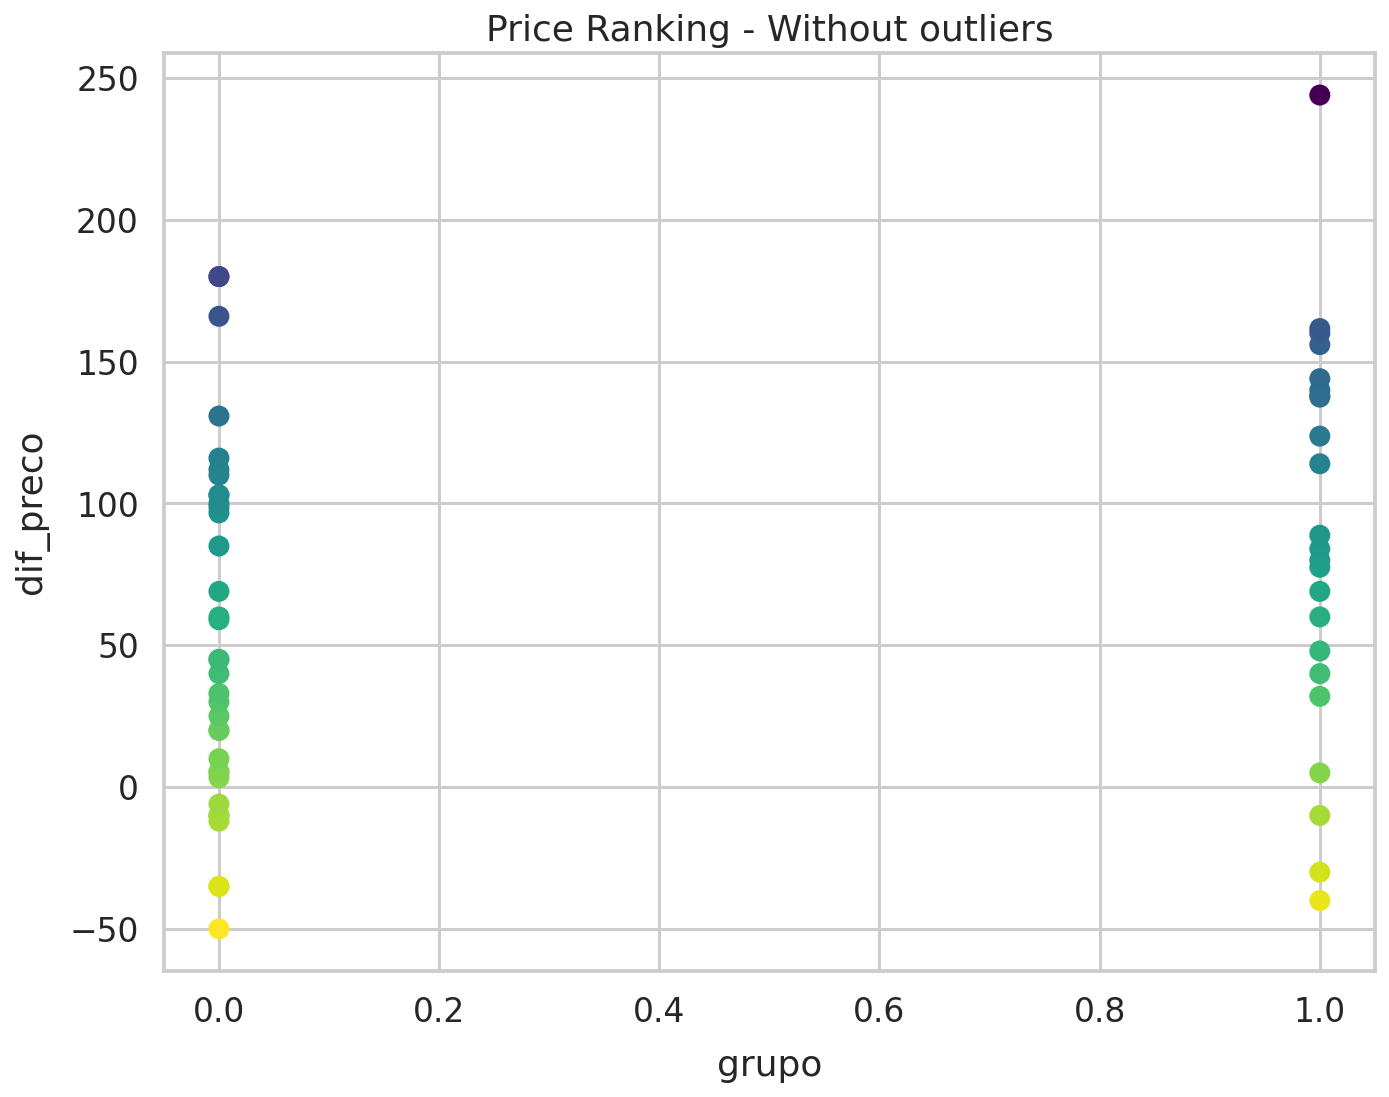

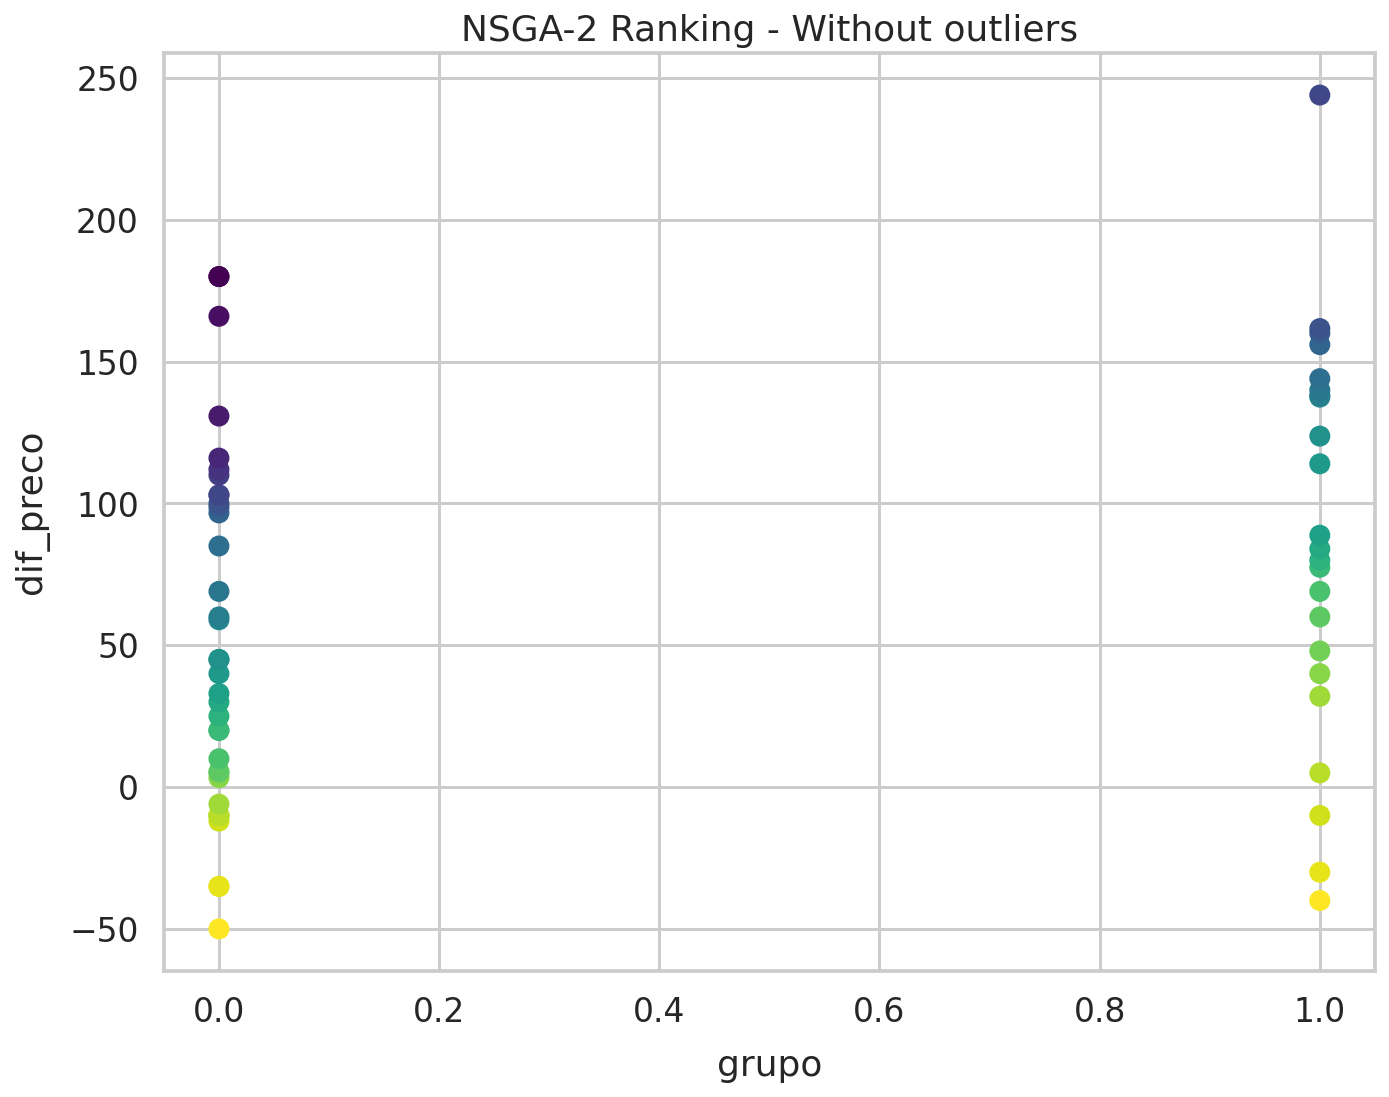

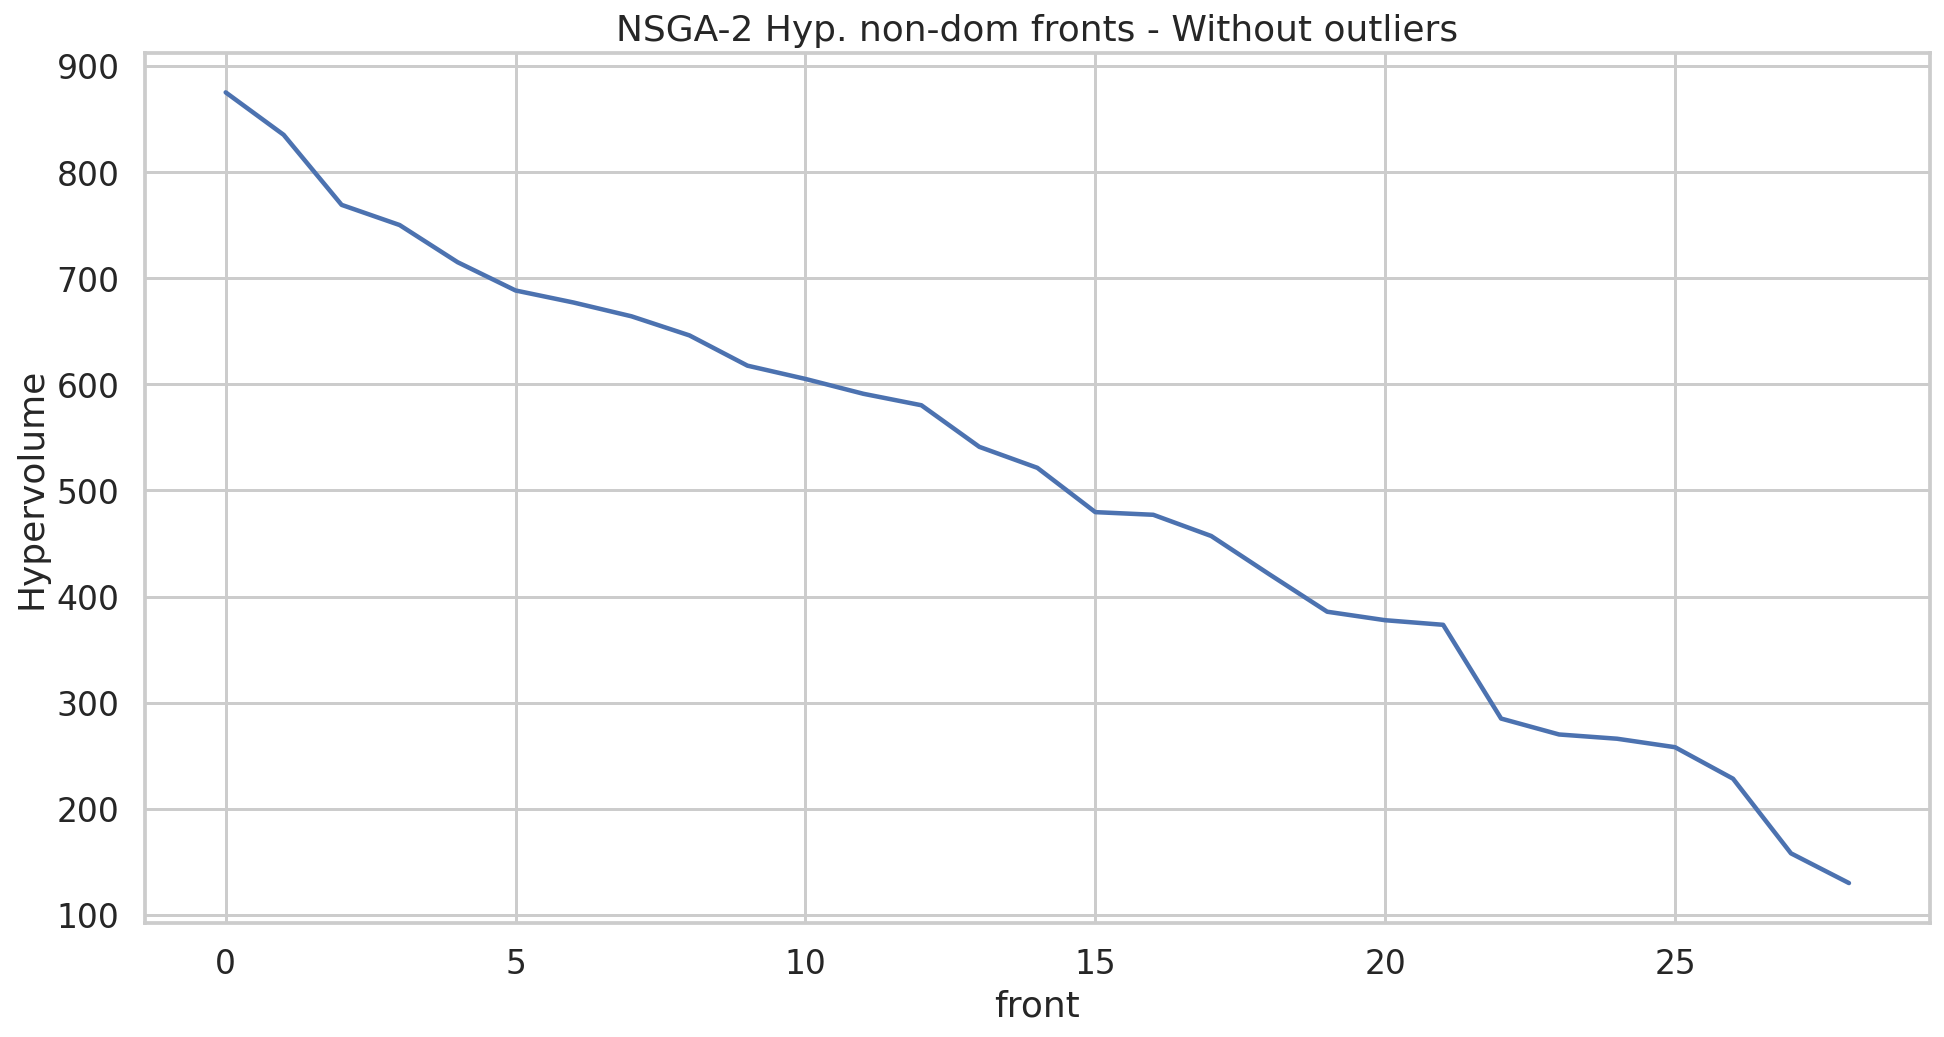

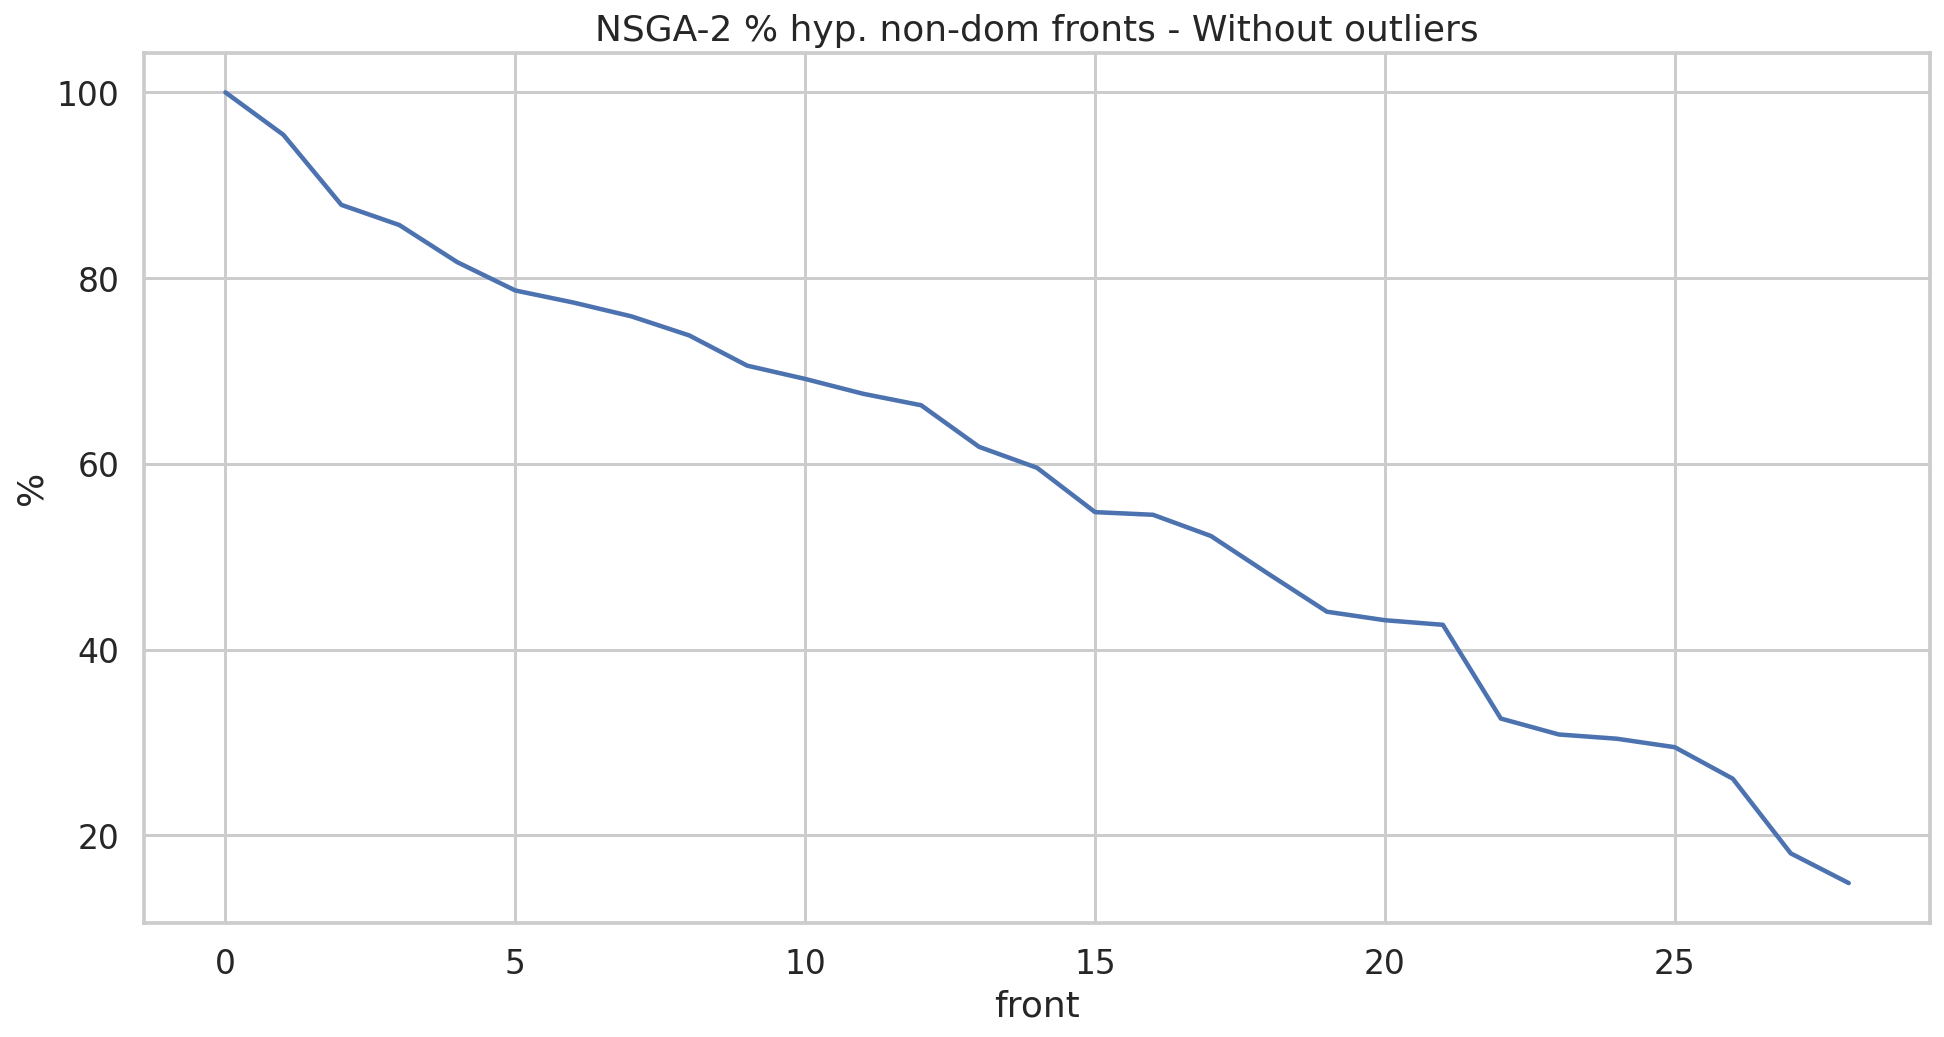

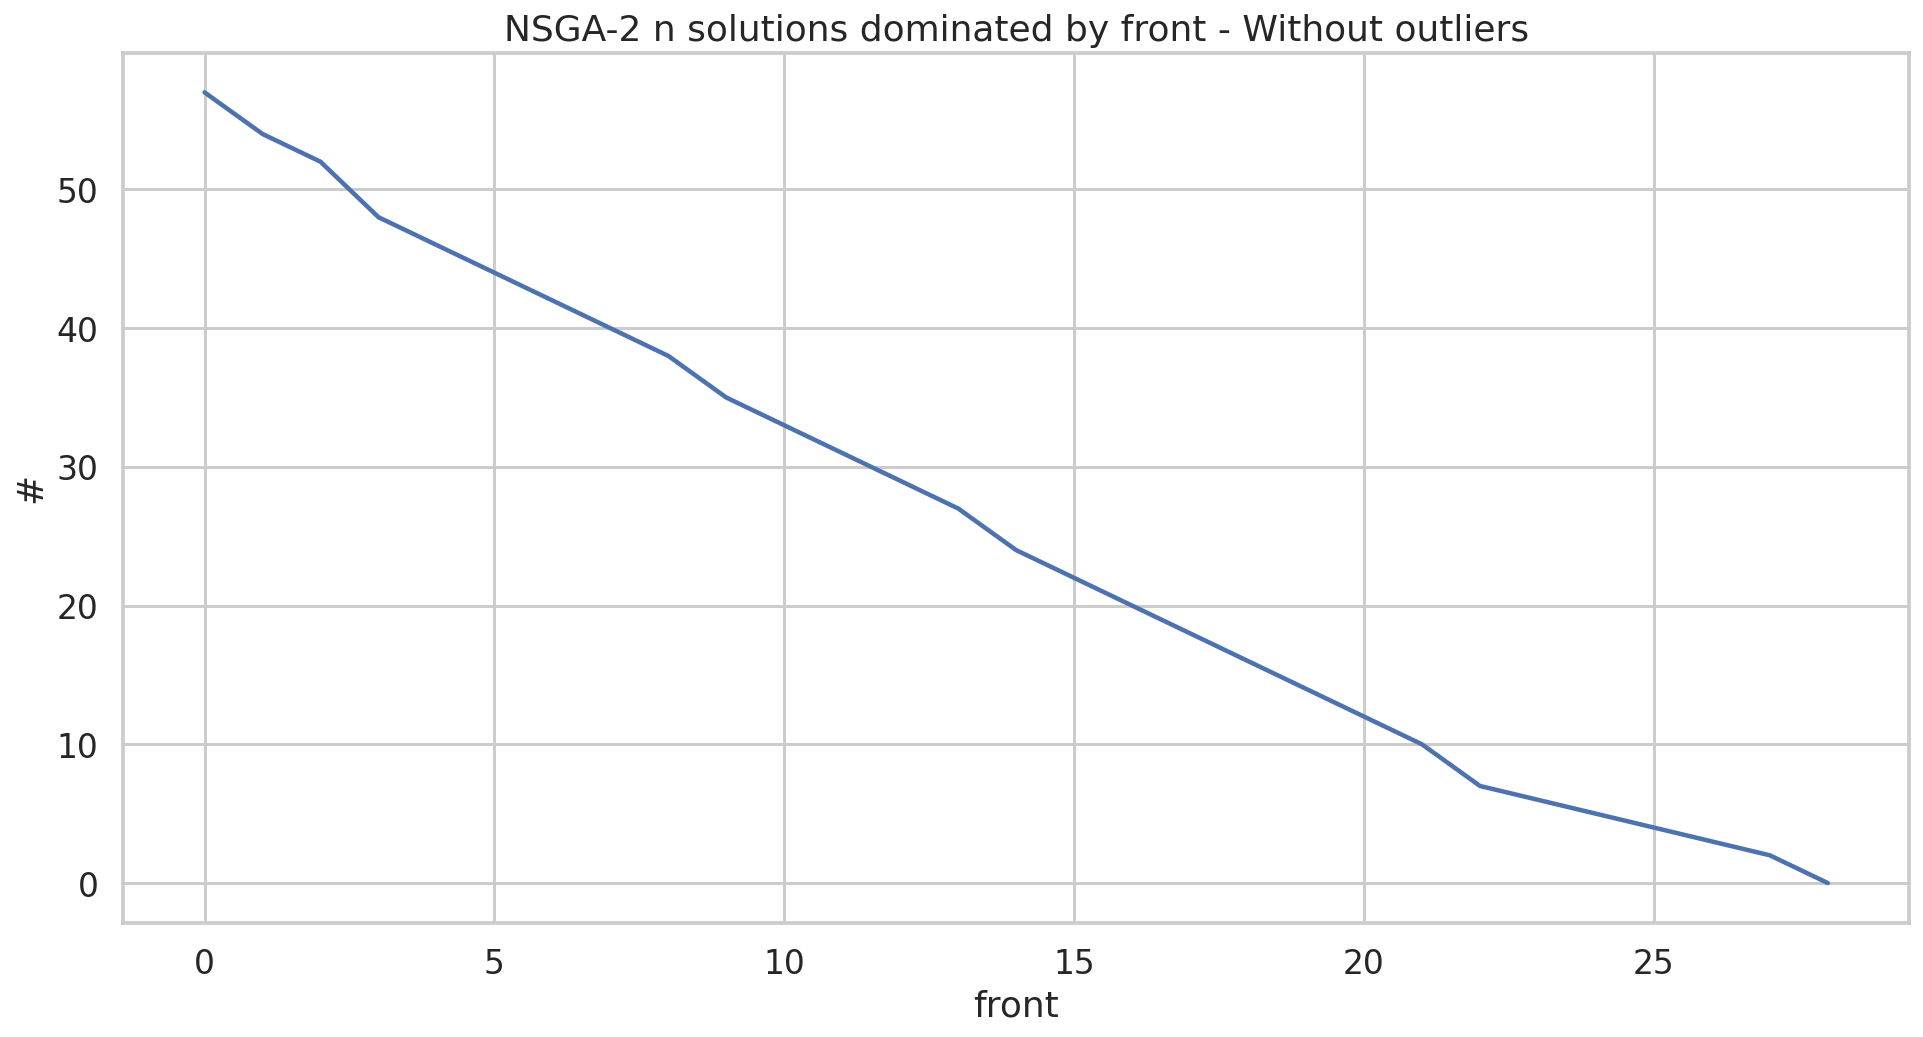

In [ ]:
#creating the datasets

###com outliers
# csv_list = ['gt_fome_clustered.csv']

###sem outliers
csv_list = ['/content/drive/Shareddrives/SCC5858/Projeto - Mercado de sementes nativas/dataset_sementes.csv']



# csv_list = ['final_dataset_2019_cluster.csv']

for csv in csv_list:
  original_df = pd.read_csv(csv, na_values=['#DIV/0!'])

  # original_df.drop(columns=['LATITUDE', 'NR_GRAU_LAT', 'NR_MIN_LAT', 'NR_SEG_LAT', 'LONGITUDE',
  #                           'NR_GRAU_LONG', 'NR_MIN_LONG', 'NR_SEG_LONG', 'NM_CLASSIF_PRODUTO',
  #                           'NM_CULTURA_GLOBAL', 'NR_AREA_TOTAL', 'NR_PRODUTIVIDADE_SEGURADA',
  #                           'NivelDeCobertura', 'VL_LIMITE_GARANTIA', 'VL_PREMIO_LIQUIDO',
  #                           'PE_TAXA', 'VL_SUBVENCAO_FEDERAL'],inplace=True)

  # original_df = original_df[original_df['VL_PREMIO_LIQUIDO_AREA'].notna()]

  original_df["grupo"].replace({"não pioneira": "0", "pioneira": "1"}, inplace=True)

  original_df['grupo'] = original_df['grupo'].astype(np.float64)

  Q1 = original_df['dif_preco'].quantile(0.25)
  Q3 = original_df['dif_preco'].quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range.

  filter = (original_df['dif_preco'] >= Q1 - 1.5 * IQR) & (original_df['dif_preco'] <= Q3 + 1.5 *IQR)
  original_df = original_df.loc[filter]


  original_df.reset_index(inplace=True,drop=True)

  # original_df['VL_LIMITE_GARANTIA_AREA'] = original_df['VL_LIMITE_GARANTIA_AREA'].astype(np.float64)

  df = original_df.copy()

  df.drop(columns=['nome'],inplace=True)


  # xxxxx - descomentar abaixo

  df2 = df.copy()

  # XXX - remover depois - teste
  # df2 = df.head(1000).copy()

  df2_copy = df2.copy()

  ###com outliers
  # df2.drop(columns=['Unnamed: 0','cluster'],inplace=True)


  # ###sem outliers
  # df2.drop(columns=['Unnamed: 0','X','cluster'],inplace=True)


  # #implementing the MOEA
  toolbox = base.Toolbox()

  creator.create("Fitness3Obj", base.Fitness, weights=(+1.0,-1.0))
  creator.create("Individual3Obj", array.array, typecode='f', fitness=creator.Fitness3Obj)

  toolbox.register("evaluate", lambda ind: already_evaluated_indivs(ind,df2))

  BOUND_LOW, BOUND_UP = 0, df2.shape[0]-1 # for already_evaluated_indiv()
  N_DIM = 2

  allint = allintallele(BOUND_LOW, BOUND_UP+1, N_DIM)

  toolbox.register("attr_int", allintf)

  toolbox.register("individual", tools.initIterate,creator.Individual3Obj, toolbox.attr_int)

  toolbox.register("population", tools.initRepeat, list, toolbox.individual)

  toolbox.pop_size = df2.shape[0]
  pop = toolbox.population(n=toolbox.pop_size)

  ## selecting the algorithm
  # toolbox.register("select", tools.selSPEA2) # <====== SPEA2 SELECTION !!!
  toolbox.register("select", tools.selNSGA2) # <====== NSGA2 SELECTION !!!

  toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0)
  toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=1.0/N_DIM)

  toolbox.max_gen  = 0 #Use zero to keep unchanged the current uploaded population
  toolbox.pop_size = df2.shape[0]
  toolbox.mut_prob = 0.2

  stats = tools.Statistics()
  stats.register("pop", copy.deepcopy)

  #running the MOEA
  res, logbook = run_ea(toolbox, stats=stats)

  #generating visualizations
  fronts = tools.sortNondominated(res, k=len(res))

  evaluations = [ toolbox.evaluate(ind) for ind in res]

  df = pd.DataFrame(evaluations, columns = ['f1','f2'])

  #change for the algorithm
  # spea2_sel = tools.selSPEA2(res,len(res))
  nsga2_sel = tools.selNSGA2(res,len(res))

  ##change for the algorithm
  ev_allPoints = [ toolbox.evaluate(ind) for ind in nsga2_sel]#nsga2_sel or spea2_sel since both have all the points
  # ev_allPoints = [ toolbox.evaluate(ind) for ind in spea2_sel]

  df_all = pd.DataFrame(list(ev_allPoints), columns=df2.columns)

  ##change for the algorithm
  #peeloff = [ g[0] for g in spea2_sel ]
  peeloff = [ g[0] for g in nsga2_sel ]

  # df_all['spea2_rank'] = peeloff
  df_all['ID'] = peeloff
  df_all['ID'] = df_all['ID'].astype(int)

  ##change for the algorithm
  # df_all['spea2_rank'] = list(df_all.index+1)
  # df_all['spea2_rank'] = df_all['nsga2_rank'].astype(int)
  df_all['nsga2_rank'] = list(df_all.index+1)
  df_all['nsga2_rank'] = df_all['nsga2_rank'].astype(int)

  fronts = tools.sortNondominated(res, k=len(res))

  df_all['front'] = [ e for e, f in enumerate(fronts) for i in f ]#(i[0],e)
  mf = len(fronts)
  df_all['front color'] = [ mf-e for e, f in enumerate(fronts) for i in f ]#(i[0],e)

  #generate visualizations
  ##figure for IPVS
  fig = plt.figure(figsize=(10,8))

  #ax = Axes3D(fig) # Method 1
  ax = fig.add_subplot(111) # Method 2

  # col = df_all.columns
  ####com outliers
  # ax.scatter(df_all['IPVS'], df_all['Número de feiras livres'], df_all['in_natura'], c=df_all['IPVS'], cmap=cmap, marker='o')

  ####sem outliers
  ax.scatter(df_all['grupo'], df_all['dif_preco'], c=df_all['dif_preco'], cmap='viridis_r', marker='o')

  ax.set_xlabel('grupo')
  ax.xaxis.labelpad=10

  ax.set_ylabel('dif_preco')
  ax.yaxis.labelpad=10

  # ax.set_zlabel('VL_LIMITE_GARANTIA_AREA')
  # ax.zaxis.labelpad=10

  plt.title("Price Ranking - Without outliers")

  plt.savefig('without_outliers_price.png')

  plt.tight_layout()
  plt.show()
  plt.close()





  ##figure after ranking
  fig = plt.figure(figsize=(10,8))

  #ax = Axes3D(fig) # Method 1
  ax = fig.add_subplot(111) # Method 2

  # col = df_all.columns
  ####com outliers
  # ax.scatter(df_all['IPVS'], df_all['Número de feiras livres'], df_all['in_natura'], c=df_all['IPVS'], cmap=cmap, marker='o')

  ####sem outliers
  ax.scatter(df_all['grupo'], df_all['dif_preco'], c=df_all['front color'], cmap='viridis', marker='o')

  ax.set_xlabel('grupo')
  ax.xaxis.labelpad=10

  ax.set_ylabel('dif_preco')
  ax.yaxis.labelpad=10

  # ax.set_zlabel('VL_LIMITE_GARANTIA_AREA')
  # ax.zaxis.labelpad=10

  plt.title("NSGA-2 Ranking - Without outliers")

  ##change for algorithm
  # plt.savefig('ranking_spea2_'+year_string+'.png')
  plt.savefig('without_outliers-ranking_nsga2.png')

  plt.tight_layout()
  plt.show()
  plt.close()


  ##change for the algorithm
  # df_all.to_csv('final_classification_spea_2019.csv')
  # df_all.to_csv('/content/results/final_classification/final_classification_nsga.csv')

  #hypervolume calculation and figures
  fronts = tools.sortNondominated(res, k=len(res))

  reference = np.max([np.max([ind.fitness.values for ind in front], axis=0) for front in fronts], axis=0) + 1

  hypervols = [bt.hypervolume(front, reference) for front in fronts]

  hypervols_df = pd.DataFrame(hypervols)
  # hypervols_df.to_csv('/content/results/hypervols_calculation/hypervols_nsga.csv')

  plt.figure(figsize=(16,8))
  plt.plot(hypervols)
  plt.xlabel('front')
  plt.ylabel('Hypervolume');

  ##change for algorithm
  # plt.title("SPEA-2 Hyp. non-dom fronts "+year_string)
  plt.title("NSGA-2 Hyp. non-dom fronts - Without outliers")

  ##change for algorithm
  # plt.savefig('hypervol_nondom_fronts_spea2_'+year_string+'.png')
  plt.savefig('without_outliers-hypervol_nondom_fronts_nsga2.png')
  plt.show()
  plt.close()


  hypervols_np = np.array(hypervols)
  hypervols_ = hypervols_np/hypervols_np.max()*100

  plt.figure(figsize=(16,8))
  plt.plot(hypervols_)
  plt.xlabel('front')
  plt.ylabel('%');

  ##change for algorithm
  # plt.title("SPEA-2 % hyp. non-dom fronts "+year_string)
  plt.title("NSGA-2 % hyp. non-dom fronts - Without outliers")

  ##change for algorithm
  # plt.savefig('perc_hypervol_nondom_fronts_spea2_'+year_string+'.png')
  plt.savefig('without_outliers-perc_hypervol_nondom_fronts_nsga2.png')
  plt.show()
  plt.close()


  tot, num_dom, perc = 0, [], []
  for f in fronts:
    tot += len(f)
  subtot = tot
  for f in fronts:
    r = subtot-len(f)
    num_dom += [r]
    perc    += [r/tot*100]
    subtot  -= len(f)

  plt.figure(figsize=(16,8))
  plt.plot(num_dom)
  plt.title("NSGA-2 n solutions dominated by front - Without outliers")
  plt.xlabel('front')
  plt.ylabel('#');
  plt.savefig('without_outliers-num_sol_dominated_fronts_nsga2.png')
  plt.show()
  plt.close()





In [ ]:
original_df.shape

(59, 3)

# XXX - a fazer
- 3 fronts -> fronteira ótima, fronteira intermediária, pior fronteira
- comparar 3 fronteiras
- analisar casos na fronteira 1 e se é possível levar um produtor do pior para o melhor front

* Download results folder as a zip file (automate in the future using google drive)